# Account X distribution analysis

In [1]:
# import all the libraries
import random
from itertools import combinations
import datetime as dt
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy as ss
from statsmodels.stats.weightstats import ztest
import lib.helpers as hlp
# %matplotlib inline

total_results_dict = {'October': {}, 'September': {}, 'August': {}}

### Lets load data from /datasets folder to work with it

In [2]:
# read datasets to analyze
da_report_10_2019 = hlp.DATASETS_PATH + 'Accout_X. Keywords data. 10_2019.csv'
da_report_09_2019 = hlp.DATASETS_PATH + 'Accout_X. Keywords data. 09_2019.csv'
da_report_08_2019 = hlp.DATASETS_PATH + 'Accout_X. Keywords data. 08_2019.csv'
df_10 = pd.read_csv(da_report_10_2019)
df_09 = pd.read_csv(da_report_09_2019)
df_08 = pd.read_csv(da_report_08_2019)

### Datasets cleaning and type conversion

In [3]:
data_types = {'Clicks': 'int', 'Impressions': 'int', 'Cost': 'float', 
              'CTR': 'float', 'Conv. value': 'float', 'All conv.': 'float',
              'Conversions': 'float', 'Cost / conv.': 'float', 'Conv. value / cost': 'float'}
rename_columns_dict = {'Cost / conv.': 'CPA', 'Conv. value / cost': 'ROAS'}
df_10.astype(data_types)
df_10.rename(columns=rename_columns_dict, inplace=True)
df_10.info()

df_09.astype(data_types)
df_09.rename(columns=rename_columns_dict, inplace=True)
df_09.info()

df_08.astype(data_types)
df_08.rename(columns=rename_columns_dict, inplace=True)
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 14 columns):
Search keyword    179 non-null object
Campaign          179 non-null object
Ad group          179 non-null object
Currency          179 non-null object
Clicks            179 non-null int64
Impressions       179 non-null int64
Cost              179 non-null float64
CTR               179 non-null float64
Conv. value       179 non-null float64
All conv.         179 non-null float64
Avg. CPC          179 non-null float64
Conversions       179 non-null float64
CPA               179 non-null float64
ROAS              179 non-null float64
dtypes: float64(8), int64(2), object(4)
memory usage: 19.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 14 columns):
Search keyword    213 non-null object
Campaign          213 non-null object
Ad group          213 non-null object
Currency          213 non-null object
Clicks            213 non-null int64


### Printing basic stats of datasets

In [4]:
print('Stats for October')
df_10.info()
print(df_10.describe())
print('#'*100)

print('Stats for September')
df_09.info()
print(df_09.describe())
print('#'*100)

print('Stats for August')
df_08.info()
print(df_08.describe())
print('#'*100)

Stats for October
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 14 columns):
Search keyword    179 non-null object
Campaign          179 non-null object
Ad group          179 non-null object
Currency          179 non-null object
Clicks            179 non-null int64
Impressions       179 non-null int64
Cost              179 non-null float64
CTR               179 non-null float64
Conv. value       179 non-null float64
All conv.         179 non-null float64
Avg. CPC          179 non-null float64
Conversions       179 non-null float64
CPA               179 non-null float64
ROAS              179 non-null float64
dtypes: float64(8), int64(2), object(4)
memory usage: 19.7+ KB
            Clicks    Impressions          Cost         CTR   Conv. value  \
count   179.000000     179.000000    179.000000  179.000000    179.000000   
mean    256.363128    3234.541899    419.989274    0.132115   2660.958715   
std     967.876662   12828.442668   1370.9509

### Plot total distributions

[(0, 0.07), (0, 100)]

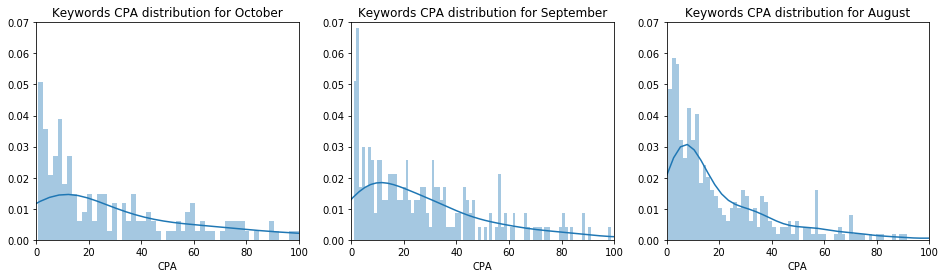

In [5]:
plot_column = 'CPA'
bins = 200
x_axis_range = (0, 100)
y_axis_range = (0, 0.07)

fig, ax = plt.subplots(1,3,figsize=(16, 4))

sns.distplot(df_10[plot_column], bins=bins, ax=ax[0])\
    .set_title(f'Keywords {plot_column} distribution for October') 
sns.distplot(df_09[plot_column], bins=bins, ax=ax[1])\
    .set_title(f'Keywords {plot_column} distribution for September')
sns.distplot(df_08[plot_column], bins=bins, ax=ax[2])\
    .set_title(f'Keywords {plot_column} distribution for August')

ax[0].set(xlim=x_axis_range, ylim=y_axis_range)
ax[1].set(xlim=x_axis_range, ylim=y_axis_range)
ax[2].set(xlim=x_axis_range, ylim=y_axis_range)





In [8]:
# CPA_df = pd.DataFrame({'October':df_10[plot_column].values, 
#                        'September':df_09[plot_column].values, 
#                        'October':df_08[plot_column].values})
# sns.boxplot(y="Campaign", x="CPA", data=CPA_df, orient="h")

ValueError: arrays must all be same length

[(0, 0.1), (0, 100)]

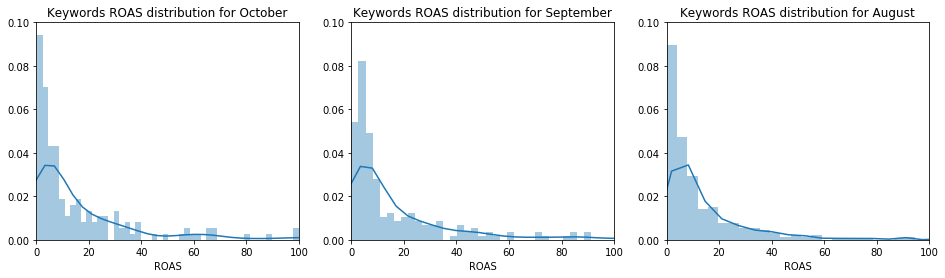

In [6]:
plot_column = 'ROAS'
bins = 200
x_axis_range = (0, 100)
y_axis_range = (0, 0.1)

fig, ax = plt.subplots(1,3,figsize=(16, 4))

sns.distplot(df_10[plot_column], bins=bins, ax=ax[0])\
    .set_title(f'Keywords {plot_column} distribution for October') 
sns.distplot(df_09[plot_column], bins=bins, ax=ax[1])\
    .set_title(f'Keywords {plot_column} distribution for September')
sns.distplot(df_08[plot_column], bins=bins, ax=ax[2])\
    .set_title(f'Keywords {plot_column} distribution for August')

ax[0].set(xlim=x_axis_range, ylim=y_axis_range)
ax[1].set(xlim=x_axis_range, ylim=y_axis_range)
ax[2].set(xlim=x_axis_range, ylim=y_axis_range)

[(0, 0.03), (0, 500)]

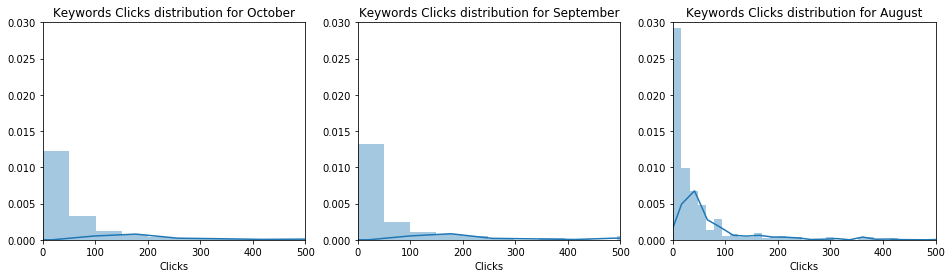

In [7]:
plot_column = 'Clicks'
bins = 200
x_axis_range = (0, 500)
y_axis_range = (0, 0.03)

fig, ax = plt.subplots(1,3,figsize=(16, 4))

sns.distplot(df_10[plot_column], bins=bins, ax=ax[0])\
    .set_title(f'Keywords {plot_column} distribution for October') 
sns.distplot(df_09[plot_column], bins=bins, ax=ax[1])\
    .set_title(f'Keywords {plot_column} distribution for September')
sns.distplot(df_08[plot_column], bins=bins, ax=ax[2])\
    .set_title(f'Keywords {plot_column} distribution for August')

ax[0].set(xlim=x_axis_range, ylim=y_axis_range)
ax[1].set(xlim=x_axis_range, ylim=y_axis_range)
ax[2].set(xlim=x_axis_range, ylim=y_axis_range)

[(0, 0.3), (0, 50)]

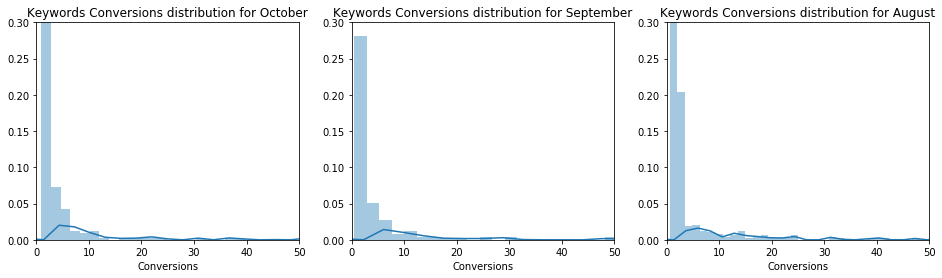

In [8]:
plot_column = 'Conversions'
bins = 200
x_axis_range = (0, 50)
y_axis_range = (0, 0.3)

fig, ax = plt.subplots(1,3,figsize=(16, 4))

sns.distplot(df_10[plot_column], bins=bins, ax=ax[0])\
    .set_title(f'Keywords {plot_column} distribution for October') 
sns.distplot(df_09[plot_column], bins=bins, ax=ax[1])\
    .set_title(f'Keywords {plot_column} distribution for September')
sns.distplot(df_08[plot_column], bins=bins, ax=ax[2])\
    .set_title(f'Keywords {plot_column} distribution for August')

ax[0].set(xlim=x_axis_range, ylim=y_axis_range)
ax[1].set(xlim=x_axis_range, ylim=y_axis_range)
ax[2].set(xlim=x_axis_range, ylim=y_axis_range)

### Overview for October for different Campaign types

In [9]:
df_10_brand = df_10[df_10['Campaign'].str.contains('Brand')]
df_09_brand = df_09[df_09['Campaign'].str.contains('Brand')]
df_08_brand = df_08[df_08['Campaign'].str.contains('Brand')]
print(df_10_brand.info(null_counts=True))
print('#'*100)
print(df_10_brand.describe(include='all'))
print('#'*100)
print(df_10_brand.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 2 to 176
Data columns (total 14 columns):
Search keyword    53 non-null object
Campaign          53 non-null object
Ad group          53 non-null object
Currency          53 non-null object
Clicks            53 non-null int64
Impressions       53 non-null int64
Cost              53 non-null float64
CTR               53 non-null float64
Conv. value       53 non-null float64
All conv.         53 non-null float64
Avg. CPC          53 non-null float64
Conversions       53 non-null float64
CPA               53 non-null float64
ROAS              53 non-null float64
dtypes: float64(8), int64(2), object(4)
memory usage: 6.2+ KB
None
####################################################################################################
            Search keyword          Campaign             Ad group Currency  \
count                   53                53                   53       53   
unique                   1                 1    

In [10]:
df_10_generic = df_10[df_10['Campaign'].str.contains('Generic')]
df_09_generic = df_09[df_09['Campaign'].str.contains('Generic')]
df_08_generic = df_08[df_08['Campaign'].str.contains('Generic')]
print(df_10_generic.info(null_counts=True))
print('#'*100)
print(df_10_generic.describe(include='all'))
print('#'*100)
print(df_10_generic.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1 to 177
Data columns (total 14 columns):
Search keyword    56 non-null object
Campaign          56 non-null object
Ad group          56 non-null object
Currency          56 non-null object
Clicks            56 non-null int64
Impressions       56 non-null int64
Cost              56 non-null float64
CTR               56 non-null float64
Conv. value       56 non-null float64
All conv.         56 non-null float64
Avg. CPC          56 non-null float64
Conversions       56 non-null float64
CPA               56 non-null float64
ROAS              56 non-null float64
dtypes: float64(8), int64(2), object(4)
memory usage: 6.6+ KB
None
####################################################################################################
            Search keyword            Campaign             Ad group Currency  \
count                   56                  56                   56       56   
unique                   1                  

In [11]:
df_10_services = df_10[df_10['Campaign'].str.contains('Service')]
df_09_services = df_09[df_09['Campaign'].str.contains('Service')]
df_08_services = df_08[df_08['Campaign'].str.contains('Service')]
print(df_10_services.info(null_counts=True))
print('#'*100)
print(df_10_services.describe(include='all'))
print('#'*100)
print(df_10_services.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 174
Data columns (total 14 columns):
Search keyword    59 non-null object
Campaign          59 non-null object
Ad group          59 non-null object
Currency          59 non-null object
Clicks            59 non-null int64
Impressions       59 non-null int64
Cost              59 non-null float64
CTR               59 non-null float64
Conv. value       59 non-null float64
All conv.         59 non-null float64
Avg. CPC          59 non-null float64
Conversions       59 non-null float64
CPA               59 non-null float64
ROAS              59 non-null float64
dtypes: float64(8), int64(2), object(4)
memory usage: 6.9+ KB
None
####################################################################################################
            Search keyword            Campaign             Ad group Currency  \
count                   59                  59                   59       59   
unique                   1                  

[(0, 0.15), (0, 200)]

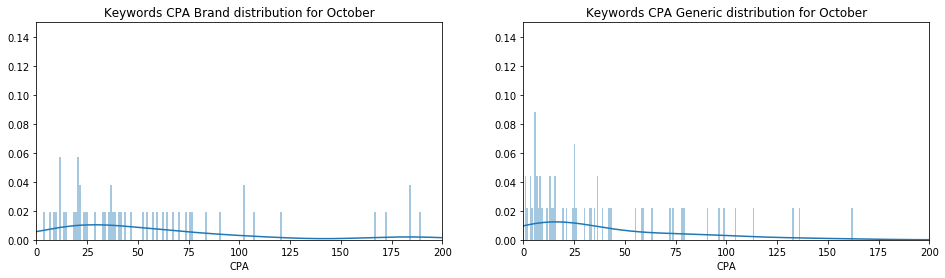

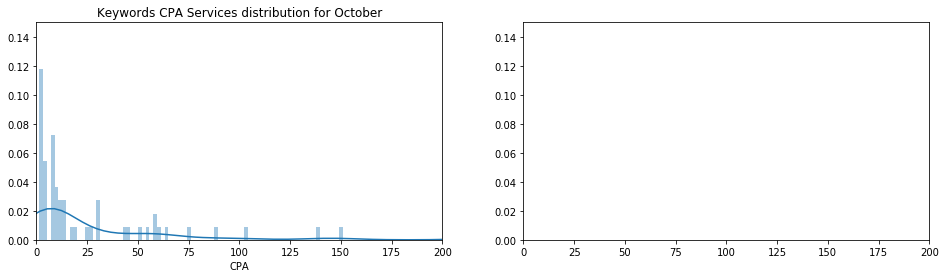

In [12]:
plot_column = 'CPA'
bins = 200
x_axis_range = (0, 200)
y_axis_range = (0, 0.15)

fig, ax = plt.subplots(1,2,figsize=(16, 4))

sns.distplot(df_10_brand[plot_column], bins=bins, ax=ax[0])\
    .set_title(f'Keywords {plot_column} Brand distribution for October') 
sns.distplot(df_10_generic[plot_column], bins=bins, ax=ax[1])\
    .set_title(f'Keywords {plot_column} Generic distribution for October')
 

ax[0].set(xlim=x_axis_range, ylim=y_axis_range)
ax[1].set(xlim=x_axis_range, ylim=y_axis_range)

fig1, ax1 = plt.subplots(1,2,figsize=(16, 4))

sns.distplot(df_10_services[plot_column], bins=bins, ax=ax1[0])\
    .set_title(f'Keywords {plot_column} Services distribution for October') 

 

ax1[0].set(xlim=x_axis_range, ylim=y_axis_range)
ax1[1].set(xlim=x_axis_range, ylim=y_axis_range)


[(0, 0.2), (0, 200)]

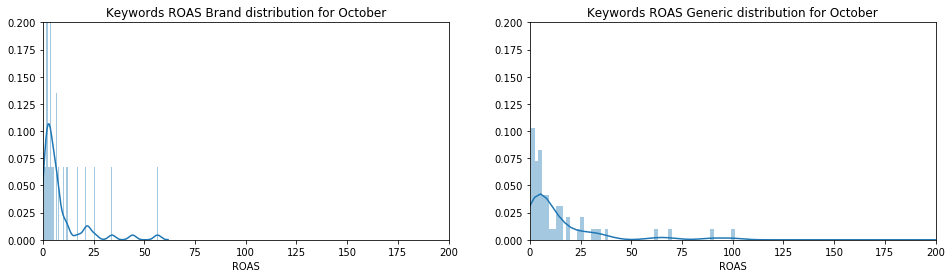

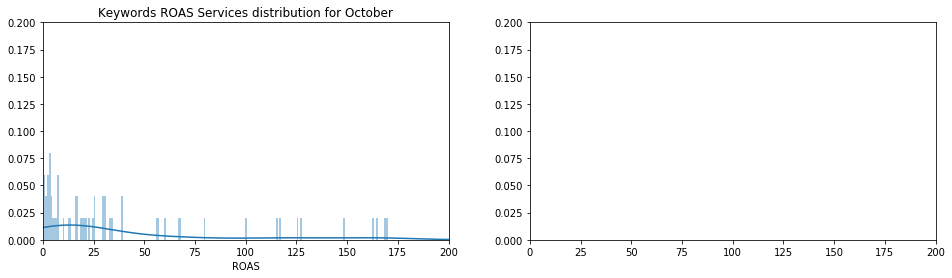

In [13]:
plot_column = 'ROAS'
bins = 200
x_axis_range = (0, 200)
y_axis_range = (0, 0.2)

fig, ax = plt.subplots(1,2,figsize=(16, 4))

sns.distplot(df_10_brand[plot_column], bins=bins, ax=ax[0])\
    .set_title(f'Keywords {plot_column} Brand distribution for October') 
sns.distplot(df_10_generic[plot_column], bins=bins, ax=ax[1])\
    .set_title(f'Keywords {plot_column} Generic distribution for October')
 

ax[0].set(xlim=x_axis_range, ylim=y_axis_range)
ax[1].set(xlim=x_axis_range, ylim=y_axis_range)

fig1, ax1 = plt.subplots(1,2,figsize=(16, 4))

sns.distplot(df_10_services[plot_column], bins=bins, ax=ax1[0])\
    .set_title(f'Keywords {plot_column} Services distribution for October') 

 

ax1[0].set(xlim=x_axis_range, ylim=y_axis_range)
ax1[1].set(xlim=x_axis_range, ylim=y_axis_range)

[(0, 0.5), (0, 50)]

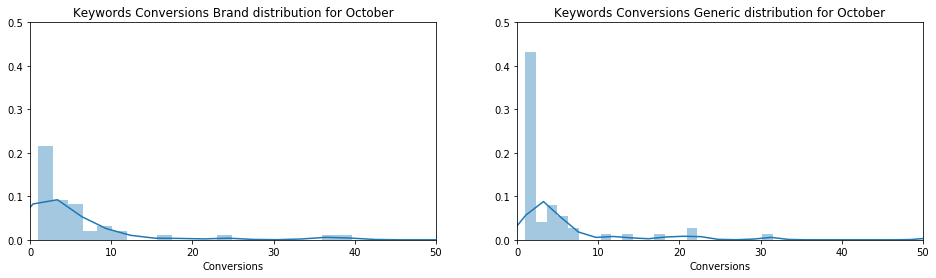

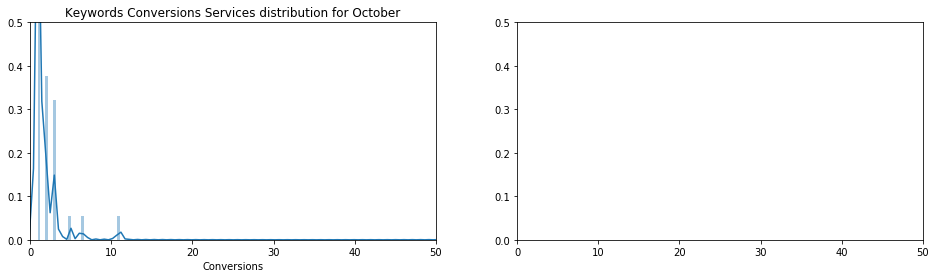

In [14]:
plot_column = 'Conversions'
bins = 200
x_axis_range = (0, 50)
y_axis_range = (0, 0.5)


fig, ax = plt.subplots(1,2,figsize=(16, 4))

sns.distplot(df_10_brand[plot_column], bins=bins, ax=ax[0])\
    .set_title(f'Keywords {plot_column} Brand distribution for October') 
sns.distplot(df_10_generic[plot_column], bins=bins, ax=ax[1])\
    .set_title(f'Keywords {plot_column} Generic distribution for October')
 

ax[0].set(xlim=x_axis_range, ylim=y_axis_range)
ax[1].set(xlim=x_axis_range, ylim=y_axis_range)

fig1, ax1 = plt.subplots(1,2,figsize=(16, 4))

sns.distplot(df_10_services[plot_column], bins=bins, ax=ax1[0])\
    .set_title(f'Keywords {plot_column} Services distribution for October') 

 

ax1[0].set(xlim=x_axis_range, ylim=y_axis_range)
ax1[1].set(xlim=x_axis_range, ylim=y_axis_range)

### Comparison for October

#### Lets prepare our dataframes to get tested

In [15]:
dfs = [df_10_brand, df_10_generic, df_10_services]
labels = ['Brand', 'Generic', 'Service']
month = 'October'
cpa_arr_list = []

min_len = len(min(dfs, key=len))

for i in range(len(dfs)):
    cpa_arr_list.append(dfs[i]['CPA'].values)
    print(f'Dataset size for {month}, {labels[i]} = {len(cpa_arr_list[i])} ')


Dataset size for October, Brand = 53 
Dataset size for October, Generic = 56 
Dataset size for October, Service = 59 


#### Visualize CPAs

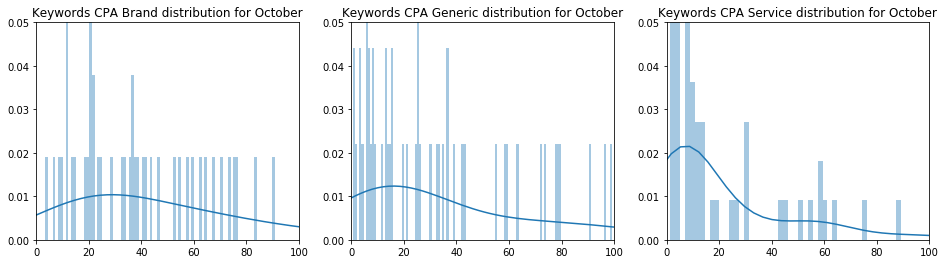

In [16]:
# visualize what we have done with data
plot_column = 'CPA'
bins = 200
x_axis_range = (0, 100)
y_axis_range = (0, 0.05)


fig, ax = plt.subplots(1, len(labels), figsize=(16, 4))

for i, cpa_arr in enumerate(cpa_arr_list):
    sns.distplot(cpa_arr, bins=bins, ax=ax[i])\
        .set_title(f'Keywords {plot_column} {labels[i]} distribution for {month}') 

    ax[i].set(xlim=x_axis_range, ylim=y_axis_range)


#### Lets calculate statistics
 <br>Null hypothesis: our samples are taken from the same population distribution.
 <br>If we observe a large p-value, for example greater than 0.05 or 0.1 then we cannot reject the null hypothesis.
 <br>P-value is confidence of null hypothesis.

In [17]:
# conduct tests for processed data
for i, j in combinations(range(len(labels)), 2):
    total_results_dict[month][f'{labels[i]} vs {labels[j]}'] = {}
    print(f'Comparison of {labels[i]} vs {labels[j]}')
    
    print('Levene Test of equality of variances')
    total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'] = \
        ss.stats.levene(cpa_arr_list[i], cpa_arr_list[j])
    print(round(total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'][1], 2))
    
    print('Wilcoxon Rank-Sum Test')
    total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Wilcoxon'] = \
        ss.stats.wilcoxon(cpa_arr_list[i][:min_len-1], cpa_arr_list[j][:min_len-1], correction=True)
    print(round(total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Wilcoxon'][1], 2))
    
    print('Kolmogorov-Smirnov Test on 2 samples')
    total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'] = \
        ss.stats.ks_2samp(cpa_arr_list[i], cpa_arr_list[j])
    print(round(total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'][1], 2))
    
    print('Kruskal-Wallis H-test for independent samples')
    total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'] = \
        ss.stats.kruskal(cpa_arr_list[i], cpa_arr_list[j])
    print(round(total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'][1], 2))
     
    
    
    print('#'*100)
print(total_results_dict)

Comparison of Brand vs Generic
Levene Test of equality of variances
0.24
Wilcoxon Rank-Sum Test
0.05
Kolmogorov-Smirnov Test on 2 samples
0.06
Kruskal-Wallis H-test for independent samples
0.02
####################################################################################################
Comparison of Brand vs Service
Levene Test of equality of variances
0.39
Wilcoxon Rank-Sum Test
0.0
Kolmogorov-Smirnov Test on 2 samples
0.0
Kruskal-Wallis H-test for independent samples
0.0
####################################################################################################
Comparison of Generic vs Service
Levene Test of equality of variances
0.98
Wilcoxon Rank-Sum Test
0.19
Kolmogorov-Smirnov Test on 2 samples
0.01
Kruskal-Wallis H-test for independent samples
0.02
####################################################################################################
{'October': {'Brand vs Generic': {'Levene': KruskalResult(statistic=5.8662456325555326, pvalue=0.015433933313671178)

### Comparison for September

#### Lets prepare our dataframes to get tested

In [18]:
dfs = [df_09_brand, df_09_generic, df_09_services]
labels = ['Brand', 'Generic', 'Service']
month = 'September'
cpa_arr_list = []

min_len = len(min(dfs, key=len))

for i in range(len(dfs)):
    cpa_arr_list.append(dfs[i]['CPA'].values)
    print(f'Dataset size for {month}, {labels[i]} = {len(cpa_arr_list[i])} ')


Dataset size for September, Brand = 55 
Dataset size for September, Generic = 54 
Dataset size for September, Service = 59 


#### Visualize CPAs

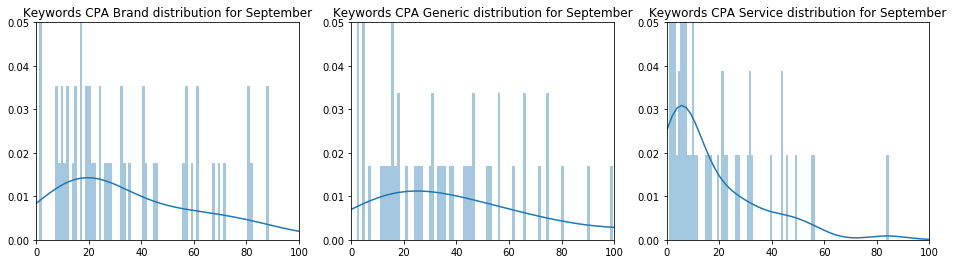

In [19]:
# visualize what we have done with data
plot_column = 'CPA'
bins = 200
x_axis_range = (0, 100)
y_axis_range = (0, 0.05)


fig, ax = plt.subplots(1, 3, figsize=(16, 4))

for i, cpa_arr in enumerate(cpa_arr_list):
    sns.distplot(cpa_arr, bins=bins, ax=ax[i])\
        .set_title(f'Keywords {plot_column} {labels[i]} distribution for {month}') 

    ax[i].set(xlim=x_axis_range, ylim=y_axis_range)


#### Lets calculate statistics
 <br>Null hypothesis: our samples are taken from the same population distribution.
 <br>If we observe a large p-value, for example greater than 0.05 or 0.1 then we cannot reject the null hypothesis.
 <br>P-value is confidence of null hypothesis.

In [20]:
# conduct tests for processed data
for i, j in combinations(range(len(labels)), 2):
    total_results_dict[month][f'{labels[i]} vs {labels[j]}'] = {}
    print(f'Comparison of {labels[i]} vs {labels[j]}')
    
    print('Levene Test of equality of variances')
    total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'] = \
        ss.stats.levene(cpa_arr_list[i], cpa_arr_list[j])
    print(round(total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'][1], 2))
    
    print('Wilcoxon Rank-Sum Test')
    total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Wilcoxon'] = \
        ss.stats.wilcoxon(cpa_arr_list[i][:min_len-1], cpa_arr_list[j][:min_len-1], correction=True)
    print(round(total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Wilcoxon'][1], 2))
    
    print('Kolmogorov-Smirnov Test on 2 samples')
    total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'] = \
        ss.stats.ks_2samp(cpa_arr_list[i], cpa_arr_list[j])
    print(round(total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'][1], 2))
    
    print('Kruskal-Wallis H-test for independent samples')
    total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'] = \
        ss.stats.kruskal(cpa_arr_list[i], cpa_arr_list[j])
    print(round(total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'][1], 2))
     
    
    
    print('#'*100)
print(total_results_dict)

Comparison of Brand vs Generic
Levene Test of equality of variances
0.37
Wilcoxon Rank-Sum Test
0.34
Kolmogorov-Smirnov Test on 2 samples
0.59
Kruskal-Wallis H-test for independent samples
0.34
####################################################################################################
Comparison of Brand vs Service
Levene Test of equality of variances
0.04
Wilcoxon Rank-Sum Test
0.0
Kolmogorov-Smirnov Test on 2 samples
0.0
Kruskal-Wallis H-test for independent samples
0.0
####################################################################################################
Comparison of Generic vs Service
Levene Test of equality of variances
0.0
Wilcoxon Rank-Sum Test
0.0
Kolmogorov-Smirnov Test on 2 samples
0.0
Kruskal-Wallis H-test for independent samples
0.0
####################################################################################################
{'October': {'Brand vs Generic': {'Levene': KruskalResult(statistic=5.8662456325555326, pvalue=0.015433933313671178), 'W

### Comparison for August

#### Lets prepare our dataframes to get tested

In [21]:
dfs = [df_08_brand, df_08_generic, df_08_services]
labels = ['Brand', 'Generic', 'Service']
month = 'August'
cpa_arr_list = []

min_len = len(min(dfs, key=len))

for i in range(len(dfs)):
    cpa_arr_list.append(dfs[i]['CPA'].values)
    print(f'Dataset size for {month}, {labels[i]} = {len(cpa_arr_list[i])} ')


Dataset size for August, Brand = 45 
Dataset size for August, Generic = 42 
Dataset size for August, Service = 33 


#### Visualize CPAs

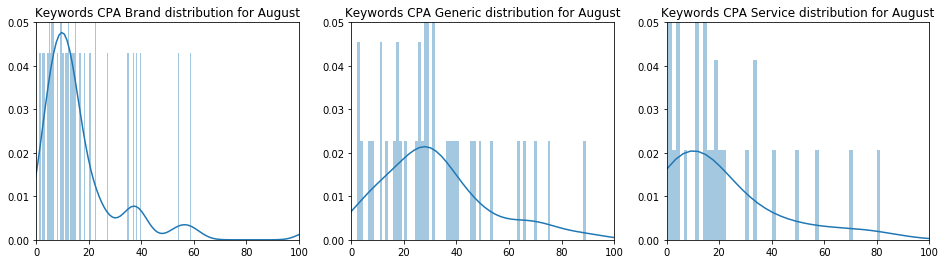

In [22]:
# visualize what we have done with data
plot_column = 'CPA'
bins = 200
x_axis_range = (0, 100)
y_axis_range = (0, 0.05)


fig, ax = plt.subplots(1, 3, figsize=(16, 4))

for i, cpa_arr in enumerate(cpa_arr_list):
    sns.distplot(cpa_arr, bins=bins, ax=ax[i])\
        .set_title(f'Keywords {plot_column} {labels[i]} distribution for {month}') 

    ax[i].set(xlim=x_axis_range, ylim=y_axis_range)


#### Lets calculate statistics
 <br>Null hypothesis: our samples are taken from the same population distribution.
 <br>If we observe a large p-value, for example greater than 0.05 or 0.1 then we cannot reject the null hypothesis.
 <br>P-value is confidence of null hypothesis.

In [23]:
# conduct tests for processed data
for i, j in combinations(range(len(labels)), 2):
    total_results_dict[month][f'{labels[i]} vs {labels[j]}'] = {}
    print(f'Comparison of {labels[i]} vs {labels[j]}')
    
    print('Levene Test of equality of variances')
    total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'] = \
        ss.stats.levene(cpa_arr_list[i], cpa_arr_list[j])
    print(round(total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'][1], 2))
    
    print('Wilcoxon Rank-Sum Test')
    total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Wilcoxon'] = \
        ss.stats.wilcoxon(cpa_arr_list[i][:min_len-1], cpa_arr_list[j][:min_len-1], correction=True)
    print(round(total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Wilcoxon'][1], 2))
    
    print('Kolmogorov-Smirnov Test on 2 samples')
    total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'] = \
        ss.stats.ks_2samp(cpa_arr_list[i], cpa_arr_list[j])
    print(round(total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'][1], 2))
    
    print('Kruskal-Wallis H-test for independent samples')
    total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'] = \
        ss.stats.kruskal(cpa_arr_list[i], cpa_arr_list[j])
    print(round(total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'][1], 2))
     
    
    
    print('#'*100)
print(total_results_dict)

Comparison of Brand vs Generic
Levene Test of equality of variances
0.11
Wilcoxon Rank-Sum Test
0.0
Kolmogorov-Smirnov Test on 2 samples
0.0
Kruskal-Wallis H-test for independent samples
0.0
####################################################################################################
Comparison of Brand vs Service
Levene Test of equality of variances
0.06
Wilcoxon Rank-Sum Test
0.05
Kolmogorov-Smirnov Test on 2 samples
0.3
Kruskal-Wallis H-test for independent samples
0.58
####################################################################################################
Comparison of Generic vs Service
Levene Test of equality of variances
0.45
Wilcoxon Rank-Sum Test
0.17
Kolmogorov-Smirnov Test on 2 samples
0.01
Kruskal-Wallis H-test for independent samples
0.02
####################################################################################################
{'October': {'Brand vs Generic': {'Levene': KruskalResult(statistic=5.8662456325555326, pvalue=0.015433933313671178),